# Project 4
# Due at 9:00 pm, Friday, May ,18
**Important**
- Each group (group size$\le 3$) submits only  one notebook on Canvas. 
- In the first cell of notebook, please type members' name **who contribute**.  
- free rider is now allowed. 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Data

In [2]:
data3=pd.DataFrame.from_csv('Rb_500ms_main/20180427_rb1805.csv')
data2=pd.DataFrame.from_csv('Rb_500ms_main/20180426_rb1805.csv')
data1=pd.DataFrame.from_csv('Rb_500ms_main/20180425_rb1805.csv')

In [3]:
data1.head()

,Code,Price,volume,Turover,Flag,Askprice0,Askvolume0,Bidprice0,Bidvolume0,HighestPrice,LowestPrice
2018-04-24 21:00:00.500,rb1805,3891.0,68.0,2645880.0,1.0,3891.0,582.0,3890.0,621.0,3891.0,3891.0
2018-04-24 21:00:01.000,rb1805,3890.0,218.0,8481560.0,1.0,3891.0,514.0,3890.0,580.0,3891.0,3890.0
2018-04-24 21:00:01.500,rb1805,3890.0,154.0,5990600.0,1.0,3891.0,519.0,3890.0,503.0,3891.0,3890.0
2018-04-24 21:00:02.000,rb1805,3890.0,64.0,2489600.0,1.0,3891.0,519.0,3890.0,471.0,3891.0,3890.0
2018-04-24 21:00:02.500,rb1805,3890.0,106.0,4123800.0,1.0,3891.0,499.0,3890.0,438.0,3891.0,3890.0


You are provided with Rb data from three days.  You may find that, every half a second, there is a record of data. 

In each DataFrame, only focus on the following variables:
- Price: last price Rb traded. 
- volume: how many shares were traded in last half second. 
- Askprice0/Askvolume0: The lowest price and shares with this price trader wants to sell at this moment
- Bidprice0/Bidvolume0: The highest price and shares with this price trader wants to buy at this moment 


## Question

We are trying to build a regression model for Y:
$$
Y_t=Price_{120+t}-Price_t
$$

Since the data is taken at a frequence of half a second, $Y_t$ is the price change in one minute.  

## Problem 1. Build response variable

Use the first two days as training data and the most recent day as the test data.

In [39]:
train=pd.concat([data1,data2],axis=0, ignore_index=False)
train.tail()

,Code,Price,volume,Turover,Flag,Askprice0,Askvolume0,Bidprice0,Bidvolume0,HighestPrice,LowestPrice
2018-04-26 14:59:58.500,rb1805,3922.0,2.0,78440.0,4.0,3922.0,2.0,3921.0,11.0,3925.0,3880.0
2018-04-26 14:59:59.000,rb1805,3922.0,0.0,0.0,4.0,3922.0,2.0,3921.0,11.0,3925.0,3880.0
2018-04-26 14:59:59.500,rb1805,3922.0,0.0,0.0,4.0,3922.0,2.0,3921.0,7.0,3925.0,3880.0
2018-04-26 15:00:00.000,rb1805,3922.0,0.0,0.0,4.0,3922.0,2.0,3921.0,7.0,3925.0,3880.0
2018-04-26 15:00:00.500,rb1805,3922.0,0.0,0.0,4.0,3922.0,2.0,3921.0,7.0,3925.0,3880.0


In [40]:
test=data3.copy()
test.tail()

,Code,Price,volume,Turover,Flag,Askprice0,Askvolume0,Bidprice0,Bidvolume0,HighestPrice,LowestPrice
2018-04-27 14:59:58.500,rb1805,3960.0,0.0,0.0,4.0,3960.0,13.0,3954.0,1.0,3964.0,3913.0
2018-04-27 14:59:59.000,rb1805,3960.0,0.0,0.0,4.0,3960.0,14.0,3954.0,1.0,3964.0,3913.0
2018-04-27 14:59:59.500,rb1805,3960.0,0.0,0.0,4.0,3960.0,14.0,3954.0,1.0,3964.0,3913.0
2018-04-27 15:00:00.000,rb1805,3954.0,2.0,79080.0,4.0,3954.0,19.0,3953.0,92.0,3964.0,3913.0
2018-04-27 15:00:00.500,rb1805,3954.0,0.0,0.0,4.0,3954.0,19.0,3953.0,92.0,3964.0,3913.0


Now we can build Y for both train and test

In [41]:
train['Y']=train['Price'].shift(-120)-train['Price']
test['Y']=test['Price'].shift(-120)-test['Price']

In [45]:
train = train.dropna(subset=['Y'])
test = test.dropna(subset=['Y'])

Please plot the histogram of Y for train. 

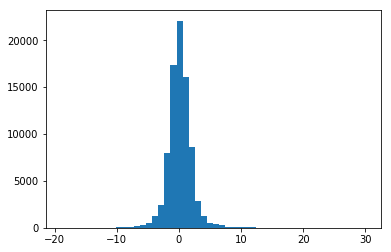

In [65]:
plt.hist(train['Y'], bins=50)
plt.show()

## Problem 2. Build predictors 

Please build 10 predictors:
- You cannot use any information occurred in the future, for example, train['price'].shift(-10)
- You only can build predictors using "Price, volume, Askprice0/Askvolume0, Bidprice0/Bidvolume0" these 6 variables whereas you can build predictors from information occurred at multiple time stamp in the past. For example train['X1']=train['Bidvolume0]]-train['Bidvolume0'].shift(10).

Notice in order to build predictable model, your predictors should have strong association with response variable. For simplicity, use correlation to select top 10 most related predictors .

Calculate 10 predictors for both train and test set. After building predictors, delete rows which have Nan values. These nan values are generated when using shift().  

## Problem 3. Build Models. 

Build multiple regression model using your own 10 predictors in train. Evaluate R2 and Se in train and test set.
Please check whether the model is consistent and accurate.  Why?

## Trade using your signal

**This part is optional and will not be graded **

Using $\hat{Y}$ as trading signal. 

Find 3% and 97% quantiles of $\hat{Y}$ using train as triggering threshold for buy and sell. Explain why we do not get quantiles using test. 

### Strategy I: 

- We will buy a share of Rb if signal is above 97% quantile and sell it if it is below 3% quantile. Compute  maximum drawdown and sharpe ratio in test. 

### Strategy II:

- In test set, buy a share of Rb if the signal is above 97% quantile and sell it in one minute. Compute maximum drawdown and sharpe ratio in test. 